In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from panoradio_hf.data import IQDataModel
from panoradio_hf.net_utils import get_model_checkpoint_dir
from panoradio_hf.deepcnn import DeepCNN 
import matplotlib.pyplot as plt
import lightning as pl
import pandas as pd
import numpy as np
import joblib as jl
import matplotlib as mpl
from panoradio_hf.net_utils import evaluate_model_predictions
import seaborn as sns
import os
from panoradio_hf.net_utils import get_model_checkpoint_dir
from panoradio_hf.net_utils import initialize_pl_trainer
%matplotlib inline

In [14]:
train_model = True

if train_model:

    iqdata = IQDataModel()
    model = DeepCNN()

    callbacks, mlf_logger = initialize_pl_trainer("deep-cnn")
    
    trainer = pl.Trainer(callbacks=callbacks,
                         max_epochs=100,
                         logger=mlf_logger)
    trainer.fit(model, iqdata)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mspcvsp/anaconda3/envs/algdev/lib/python3.9/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /home/mspcvsp/ModelCheckpoints/panorado_hf/deep-cnn exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type               | Params | Mode 
---------------------------------------------------------------
0  | loss           | CrossEntropyLoss   | 0      | train
1  | train_accuracy | MulticlassAccuracy | 0      | train
2  | val_accuracy   | MulticlassAccuracy | 0      | train
3  | test_accuracy  | MulticlassAccuracy | 0      | train
4  | conv1          | Sequential         | 13.1 K | train
5  | conv2          | Sequential         | 25.0 K | train
6  | conv3          | Sequential         | 74.5 K | train
7  | conv4          | Sequential         | 99.1 K | train
8  | conv5          | Sequential        

Sanity Checking: |                                                         | 0/? [00:00<?, ?it/s]

Training: |                                                                | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

In [15]:
ls /home/mspcvsp/ModelCheckpoints/panorado_hf/deep-cnn/

'epoch=14-val_loss=0.00-other_metric=0.00.ckpt'
'epoch=19-val_loss=0.00-other_metric=0.00.ckpt'


In [16]:
model_checkpoint = "epoch=19-val_loss=0.00-other_metric=0.00.ckpt"

model_checkpoint_pth =\
    get_model_checkpoint_dir("deep-cnn").joinpath(model_checkpoint)

model = DeepCNN.load_from_checkpoint(model_checkpoint_pth)
trainer = pl.Trainer()
predictions = trainer.predict(model,
                              datamodule=IQDataModel())

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                              | 0/? [00:00<?, ?it/s]

In [17]:
from panoradio_hf.net_utils import init_snrid_accuracy

Text(0.5, 0, 'SNR [dB]')

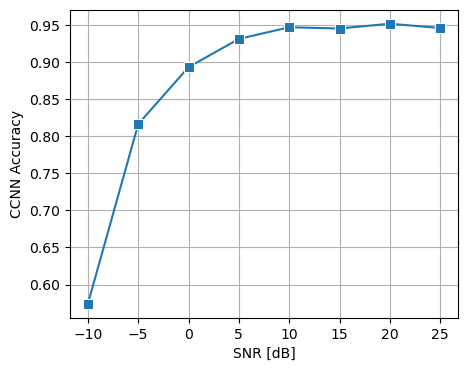

In [18]:
snrid_clf_report, snrid_conf_mat =\
    evaluate_model_predictions(predictions)

cnn_snrid_acc = init_snrid_accuracy(snrid_clf_report)

h_ax = plt.figure(figsize=(5, 4)).gca()
sns.lineplot(cnn_snrid_acc,
             x="snr",
             y="ccnn",
             marker="s",
             markersize=7,
             ax=h_ax)
h_ax.grid(True)
h_ax.set_ylabel("CCNN Accuracy")
h_ax.set_xlabel("SNR [dB]")